In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
forest_df=pd.read_csv("forest_dataset_cleaned.csv")

In [3]:
forest_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
forest_df.drop(labels=["day","month","year"],axis=1,inplace=True)

In [5]:
forest_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
forest_df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
forest_df["Classes"]=forest_df["Classes"].str.strip()
forest_df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [9]:
# encoding the classes
forest_df["Classes"]=np.where(forest_df["Classes"]=='not fire',0,1)
forest_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [10]:
forest_df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

# Independent and Dependent features

In [14]:
X=forest_df.drop(labels="FWI",axis=1)
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [13]:
Y=forest_df["FWI"]
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [17]:
X_train.shape

(182, 11)

In [18]:
y_train.shape

(182,)

In [19]:
X_test.shape

(61, 11)

In [33]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.629848,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.717804,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,-0.023558,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.345707,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.750799,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.685656,0.617273,0.212582
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,1.000000,0.742977,0.296441
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.742977,1.000000,0.188837
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,0.296441,0.188837,1.000000


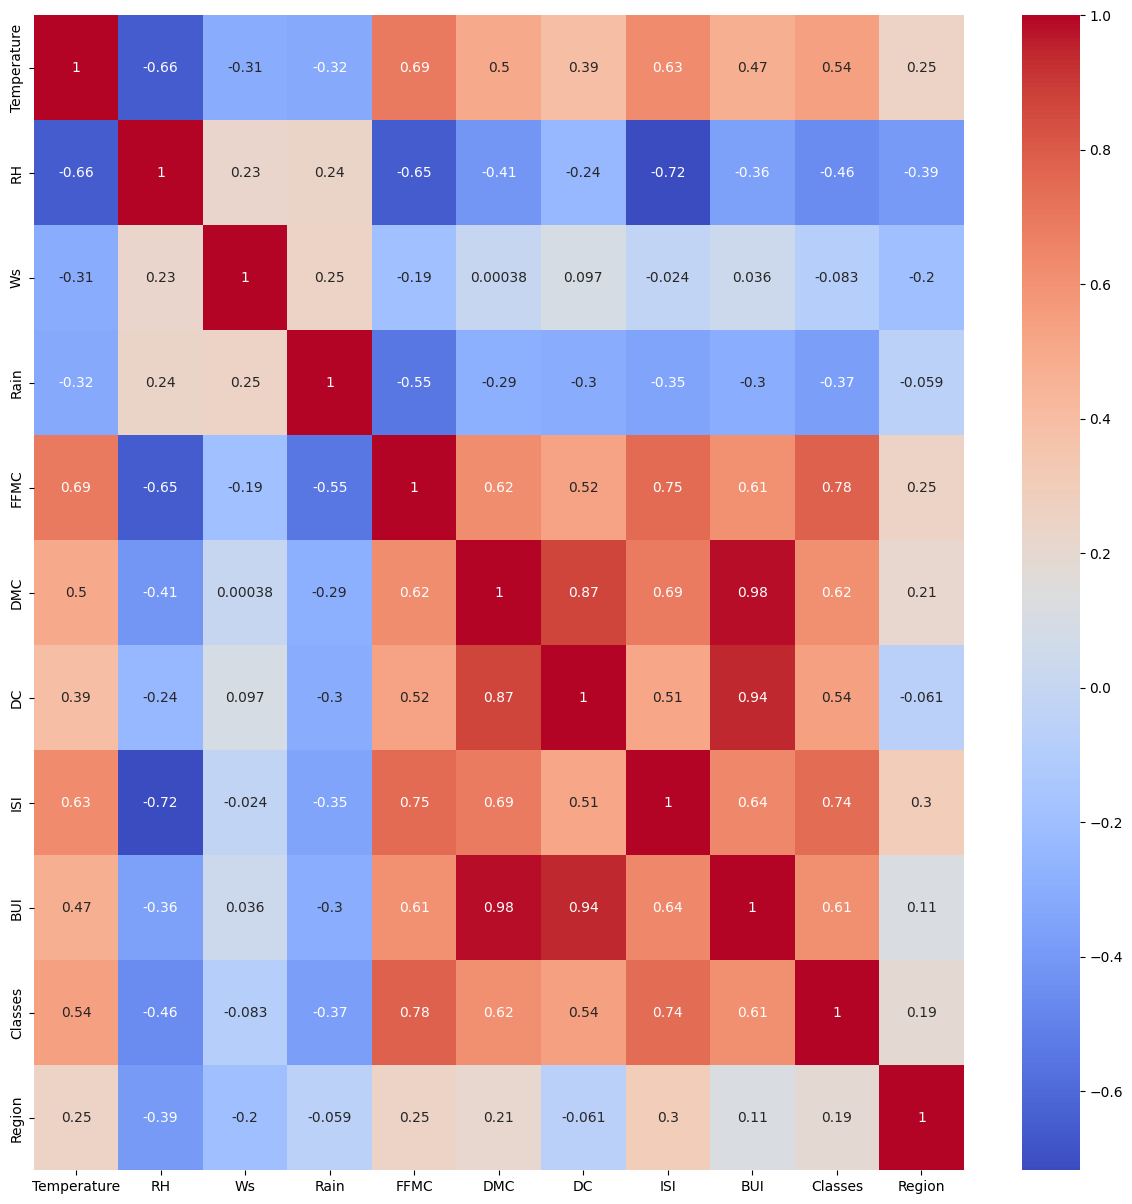

In [23]:
# feature selection based on multicollinearity
input_corr=X_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(input_corr,cmap="coolwarm",annot=True)
plt.show()

In [24]:
def multicollinearity(dataset,threshold):
    multi_co_features=set()
    corr_matrix=dataset.corr()

    for j in range (len(corr_matrix.columns)):
        for i in range(j):
            if(abs(corr_matrix.iloc[i,j])>threshold):
                feature_name=corr_matrix.columns[j]
                multi_co_features.add(feature_name)
    
    return multi_co_features

In [27]:
corr_features=multicollinearity(X_train,0.85)

In [28]:
corr_features

{'BUI', 'DC'}

In [29]:
# drop features having correlation>0.85
X_train.drop(labels=corr_features,axis=1,inplace=True)

In [30]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


In [31]:
X_test.drop(labels=corr_features,axis=1,inplace=True)

In [32]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1


# Standardization

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scale=StandardScaler()

In [36]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [37]:
X_train,X_test

(array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526, -0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         -1.10431526,  1.01105006],
        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
          0.90553851,  1.01105006],
        ...,
        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         -1.10431526, -0.98907071],
        [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
          0.90553851,  1.01105006],
        [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         -1.10431526, -0.98907071]], shape=(182, 9)),
 array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
         -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
          2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
        [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
         -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
          3.65823283e-01,  9.05538514e-01, -9.89070710e-

# Model Training

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(n_jobs=-1)

In [39]:
lin_reg.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [41]:
mse=mean_squared_error(y_true=y_test,y_pred=lin_reg.predict(X_test))
mae=mean_absolute_error(y_true=y_test,y_pred=lin_reg.predict(X_test))
r2_val=r2_score(y_true=y_test,y_pred=lin_reg.predict(X_test))

In [42]:
print(mse)
print(mae)
print(r2_val)

0.674276687379158
0.5468236465249978
0.9847657384266951


In [43]:
y_pred=lin_reg.predict(X_test)

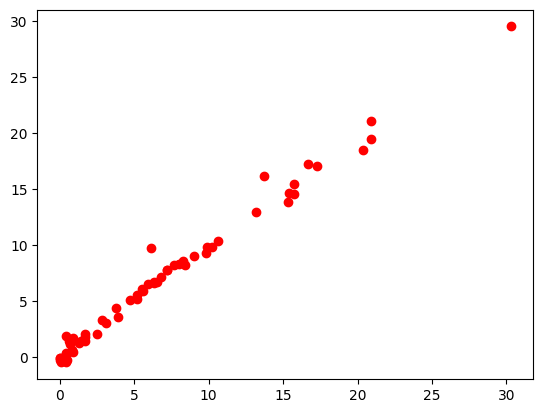

In [46]:
plt.scatter(y_test,y_pred,color="red") # it follows a linear relationship, so the model is very good
plt.show()

# Apply Lasso Regression

In [47]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [48]:
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)
y_pred_lasso=lasso_reg.predict(X_test)
mse=mean_squared_error(y_true=y_test,y_pred=y_pred_lasso)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred_lasso)
r2_val=r2_score(y_true=y_test,y_pred=y_pred_lasso)
print(mse)
print(mae)
print(r2_val)

2.2483458918974772
1.133175994914409
0.9492020263112388


# Apply Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [50]:
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
y_pred_ridge=ridge_reg.predict(X_test)
mse=mean_squared_error(y_true=y_test,y_pred=y_pred_ridge)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred_ridge)
r2_val=r2_score(y_true=y_test,y_pred=y_pred_ridge)
print(mse)
print(mae)
print(r2_val)

0.6949198918152096
0.5642305340105715
0.9842993364555512


# Apply ElasticNet

In [51]:
from sklearn.linear_model import ElasticNet

In [52]:
elasticnet_reg=ElasticNet()
elasticnet_reg.fit(X_train,y_train)
y_pred_elasticnet=elasticnet_reg.predict(X_test)
mse=mean_squared_error(y_true=y_test,y_pred=y_pred_elasticnet)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred_elasticnet)
r2_val=r2_score(y_true=y_test,y_pred=y_pred_elasticnet)
print(mse)
print(mae)
print(r2_val)

5.5172511010252245
1.8822353634896005
0.8753460589519703


# Apply Lasso Regression

In [53]:
from sklearn.linear_model import LassoCV

In [54]:
lassocv=LassoCV(cv=5)

In [55]:
lassocv.fit(X_train,y_train)
lassocv.predict(X_test)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [61]:
lassocv.alpha_ # the chosen alpha value

np.float64(0.05725391318234408)

In [60]:
lassocv.alphas_  # all the tried and tested alpha values

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [ ]:
lassocv.mse_path_ # all the mse for each and every alpha

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [63]:
y_pred_lassocv=lassocv.predict(X_test)

In [64]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred_lassocv)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred_lassocv)
r2_val=r2_score(y_true=y_test,y_pred=y_pred_lassocv)
print(mse)
print(mae)
print(r2_val)

0.792499555474362
0.619970115826343
0.9820946715928275


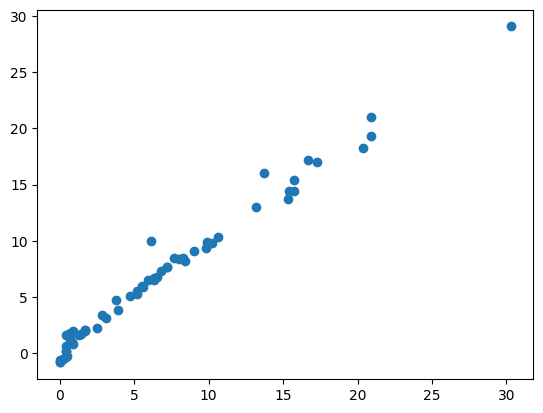

In [65]:
plt.scatter(y_test,y_pred_lassocv)
plt.show()

# Apply RidgeCV

In [66]:
from sklearn.linear_model import RidgeCV

In [71]:
ridgecv=RidgeCV(cv=5)

In [72]:
ridgecv.fit(X_train,y_train)
y_pred_ridgecv=ridgecv.predict(X_test)

In [73]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred_ridgecv)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred_ridgecv)
r2_val=r2_score(y_true=y_test,y_pred=y_pred_ridgecv)
print(mse)
print(mae)
print(r2_val)

0.6949198918152096
0.5642305340105715
0.9842993364555512


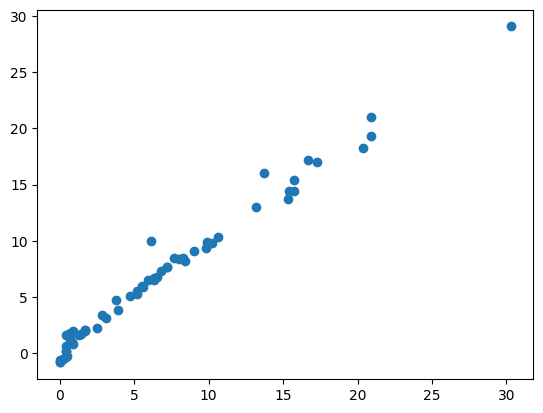

In [74]:
plt.scatter(y_test,y_pred_lassocv)
plt.show()

In [75]:
ridgecv.alpha_

np.float64(1.0)

In [77]:
ridgecv.alphas

(0.1, 1.0, 10.0)

# ElasticNetCV

In [78]:
from sklearn.linear_model import ElasticNetCV

In [79]:
elasticnetcv=ElasticNetCV(cv=5)

In [81]:
elasticnetcv.fit(X_train,y_train)
y_pred_elasticcv=elasticnetcv.predict(X_test)

In [82]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred_elasticcv)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred_elasticcv)
r2_val=r2_score(y_true=y_test,y_pred=y_pred_elasticcv)
print(mse)
print(mae)
print(r2_val)

0.8222830416276258
0.6575946731430898
0.9814217587854941
